In [1]:
# compute kl divergence between two multivariate gaussians pytorch

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.distributions as dist

# define two multivariate gaussians
dim = 3
batch = 10
mu1 = torch.zeros(batch, dim)
sigma1 = torch.eye(dim, dim).repeat(batch, 1, 1)
mu2 = torch.rand(batch, dim)
sigma2 = torch.rand(batch, dim, dim)
sigma2 = torch.bmm(sigma2, sigma2.transpose(1,2)) # make it positive definite

In [6]:
time_points = 5
x = torch.linspace(-2, 0.5, time_points)
# construct x - x' for all pairs of x and x'
y = x.view(-1, 1) - x.view(1, -1)
# construct the kernel
K = torch.exp(-y.pow(2)/2*sigma**2)


tensor([[ 0.0000, -0.6250, -1.2500, -1.8750, -2.5000],
        [ 0.6250,  0.0000, -0.6250, -1.2500, -1.8750],
        [ 1.2500,  0.6250,  0.0000, -0.6250, -1.2500],
        [ 1.8750,  1.2500,  0.6250,  0.0000, -0.6250],
        [ 2.5000,  1.8750,  1.2500,  0.6250,  0.0000]])


In [3]:
# create multivariate gaussians
p = dist.MultivariateNormal(mu1, sigma1)
q = dist.MultivariateNormal(mu2, sigma2)

# compute the kl divergence
kl = dist.kl_divergence(p, q)
print(kl)

tensor([ 41.9121, 292.6989, 108.0850,  48.8712,  16.4371,   8.5017, 609.1622,
          9.5940,   6.4278,   7.7992])


In [18]:
det = torch.det(sigma2)
kl_loss = 0.5 * torch.sum(torch.sum(mu2.pow(2), dim=1) + torch.einsum("...ii", sigma2) - mu2.shape[1] - torch.log(det))
print(kl_loss)

tensor(38.0896)


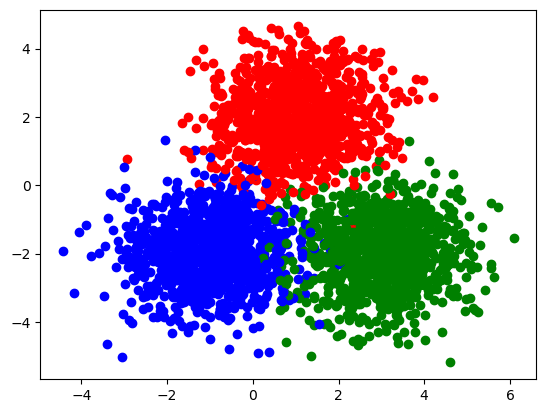

In [14]:
mu = torch.tensor([[1.0, 2.0], [-1, -2], [3, -2]])
cov = torch.tensor([[1.0, 0.0], [0.0, 1.0]]).repeat(3, 1, 1)
dist = torch.distributions.MultivariateNormal(mu, scale_tril=cov)
# samples
for _ in range(1000):
    samples = dist.sample()
    # print(samples.shape)
    plt.scatter(samples[0, 0], samples[0, 1], c='r')
    plt.scatter(samples[1, 0], samples[1, 1], c='b')
    plt.scatter(samples[2, 0], samples[2, 1], c='g')